# **Feature Extraction and Fine-Tuning with MobileNetV2 and Hyperparameter Optimization**

This notebook illustrates the process of leveraging MobileNetV2 for feature extraction and fine-tuning on a custom dataset. The primary focus is on optimizing hyperparameters to enhance model performance.

In [ ]:
%run -i Model.ipynb

### **Importing necessary libraries**

In [16]:
from keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch
import matplotlib.pyplot as plt

### **Hyperparameter Tuning with Random Search**

In [15]:
tuner = RandomSearch(
    build_model_feature_extraction,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=1,
    directory='./',
    project_name='Image_classification_food_ingredients_v1'
)

tuner.search(train_ds, epochs=3, validation_data=val_ds)

Trial 3 Complete [00h 02m 07s]
val_accuracy: 0.6886075735092163

Best val_accuracy So Far: 0.6886075735092163
Total elapsed time: 00h 07m 03s


### **Get the best hyperparameters**

In [18]:
# Get the best hyperparameters from the tuner
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Retrieve the best learning rate from the best hyperparameters
base_learning_rate = best_hps.get('learning_rate')


### **Build feature extraction model and show summary**

In [19]:
# Build the model using the best hyperparameters for feature extraction
model = build_model_feature_extraction(best_hps)

# Print a summary of the model architecture
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               655872    
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)              

### **Visualize the model architecture with shape information**

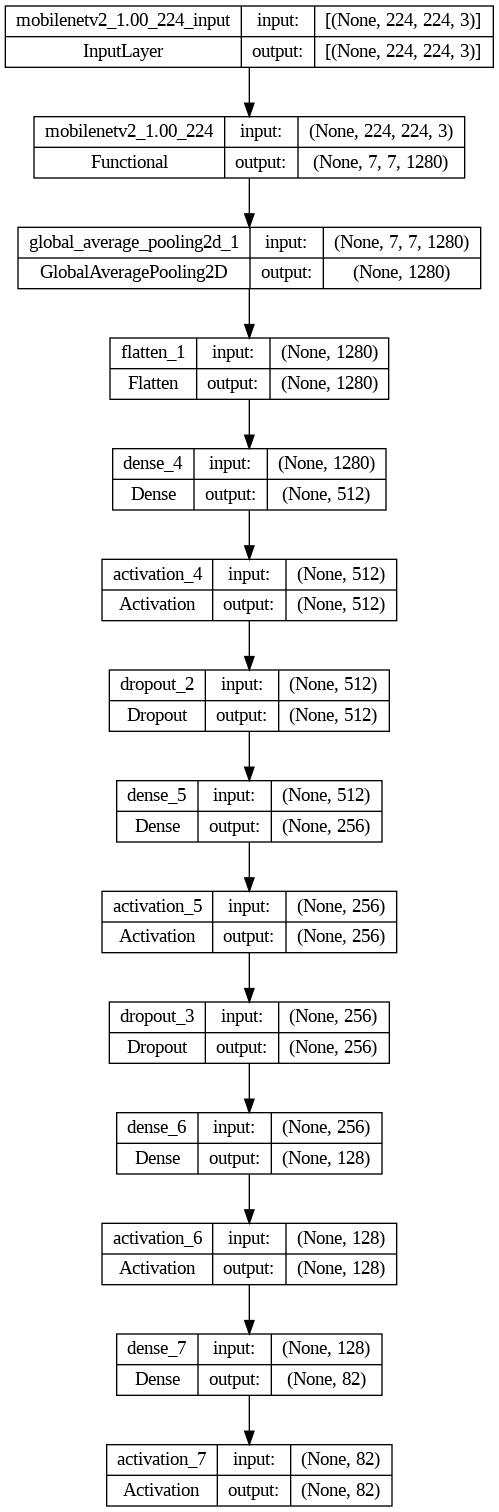

In [20]:
tf.keras.utils.plot_model(model, show_shapes=True)

### **Early Stopping Configuration for Model Training**

In [22]:
early_stopping = EarlyStopping(
    monitor="val_loss",      # Monitor validation loss
    min_delta=0.001,         # Minimum change in the monitored quantity to qualify as an improvement
    patience=3,             # Number of epochs with no improvement after which training will be stopped
    verbose=1,               # Verbosity mode. 0: silent, 1: progress bar, 2: one line per epoch
    mode="auto",             # Direction of improvement to detect, automatically inferred from the monitored quantity
    baseline=None,           # Baseline value for the monitored quantity, used for early stopping
    restore_best_weights=False  # Whether to restore model weights from the epoch with the best value of the monitored quantity
)

### **Number of epochs for training**

In [23]:
epochs_size = 10

### **Model Training with Feature Extraction and Early Stopping**

In [24]:
print("Feature extraction\n")

# Train the model with feature extraction and early stopping
history_feature_extraction = model.fit(train_ds, epochs=epochs_size, validation_data=val_ds, callbacks=early_stopping)

Feature extraction

Epoch 1/10
77/77 [==============================] - 38s 408ms/step - loss: 4.2405 - accuracy: 0.0618 - val_loss: 3.2795 - val_accuracy: 0.3139
Epoch 2/10
77/77 [==============================] - 34s 405ms/step - loss: 2.9257 - accuracy: 0.3034 - val_loss: 1.7671 - val_accuracy: 0.5582
Epoch 3/10
77/77 [==============================] - 35s 410ms/step - loss: 1.9325 - accuracy: 0.5075 - val_loss: 1.2386 - val_accuracy: 0.6886
Epoch 4/10
77/77 [==============================] - 34s 405ms/step - loss: 1.4602 - accuracy: 0.6124 - val_loss: 0.8806 - val_accuracy: 0.7570
Epoch 5/10
77/77 [==============================] - 33s 397ms/step - loss: 1.0248 - accuracy: 0.7117 - val_loss: 0.5983 - val_accuracy: 0.8506
Epoch 6/10
77/77 [==============================] - 33s 391ms/step - loss: 0.7835 - accuracy: 0.7784 - val_loss: 0.4674 - val_accuracy: 0.8911
Epoch 7/10
77/77 [==============================] - 33s 395ms/step - loss: 0.5999 - accuracy: 0.8251 - val_loss: 0.3451 - 

### **Accuracy and Loss Comparison Across Epochs- Feature Extraction**

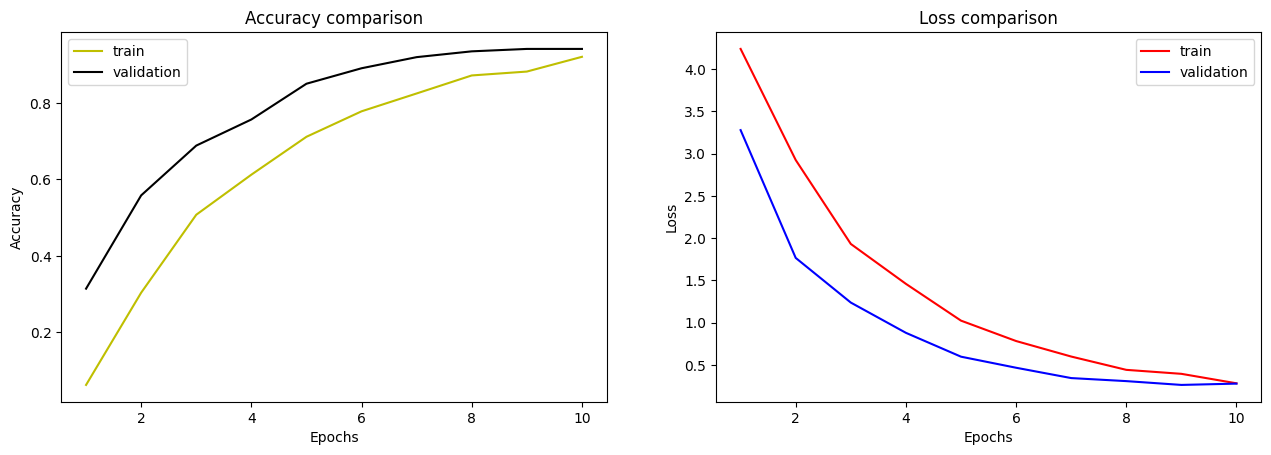

In [25]:
epochs = range(1, len(history_feature_extraction.history['accuracy']) + 1)

# Plot accuracy and loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history_feature_extraction.history['accuracy'], color='y', label='train')
plt.plot(epochs, history_feature_extraction.history['val_accuracy'], color='k', label='validation')
plt.legend()
plt.title('Accuracy comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, history_feature_extraction.history['loss'], color='r', label='train')
plt.plot(epochs, history_feature_extraction.history['val_loss'], color='b', label='validation')
plt.legend()
plt.title('Loss comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplots_adjust(right=2)
plt.show()

### **Build the fine tuning model**

In [35]:
build_model_fine_tuning()

### **Compile the fine tuning model**

In [36]:
model.compile(optimizer=Adam(learning_rate=base_learning_rate/10), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### **Summary of fine tuning model**

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               655872    
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)              

### **Visulaize the fine tuning model**

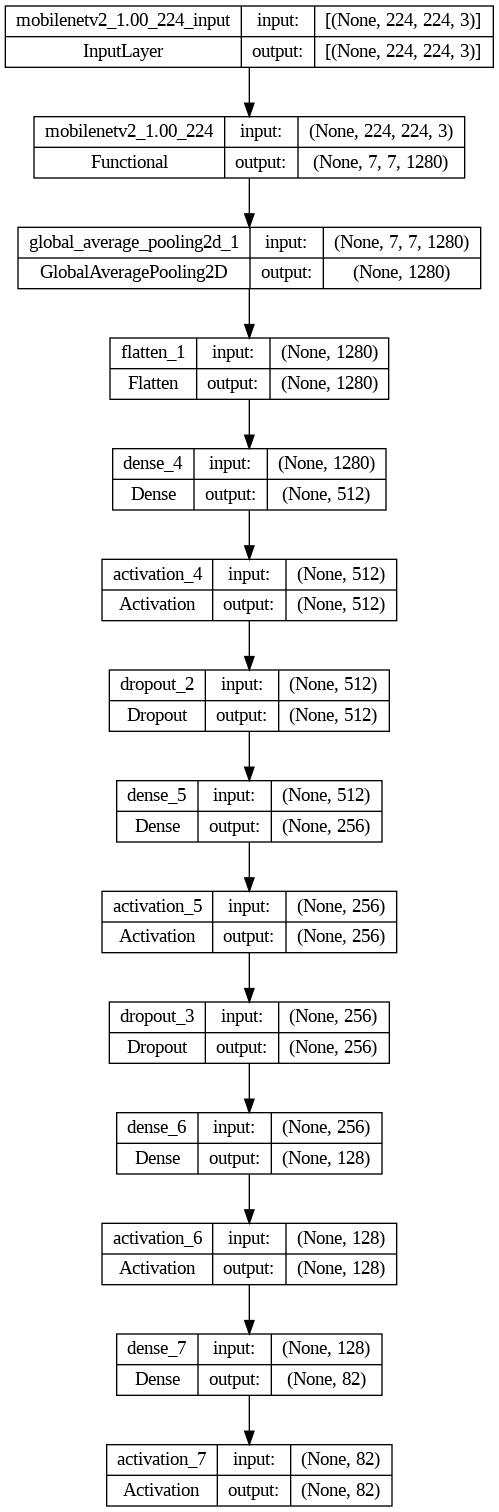

In [38]:
tf.keras.utils.plot_model(model, show_shapes=True)

### **Continue training the model**

In [39]:
# Calculate the initial number of epochs based on the length of the accuracy history
initial_epochs = len(history_feature_extraction.history['accuracy'])

# Define the number of epochs for fine-tuning
fine_tune_epochs = 10

# Calculate the total number of epochs for fine-tuning
total_epochs = initial_epochs + fine_tune_epochs


### **Model Training with Fine tuning and Early Stopping**

In [41]:
print("Fine tuning\n")
history_fine_tuning = model.fit(train_ds, epochs=total_epochs, initial_epoch=initial_epochs, validation_data=val_ds, callbacks=early_stopping)

Fine tuning

Epoch 11/20
77/77 [==============================] - 53s 412ms/step - loss: 0.1881 - accuracy: 0.9435 - val_loss: 0.3693 - val_accuracy: 0.9304
Epoch 12/20
77/77 [==============================] - 35s 417ms/step - loss: 0.1741 - accuracy: 0.9463 - val_loss: 0.2769 - val_accuracy: 0.9468
Epoch 13/20
77/77 [==============================] - 36s 435ms/step - loss: 0.1709 - accuracy: 0.9427 - val_loss: 0.2616 - val_accuracy: 0.9443
Epoch 14/20
77/77 [==============================] - 35s 405ms/step - loss: 0.1562 - accuracy: 0.9500 - val_loss: 0.2625 - val_accuracy: 0.9468
Epoch 15/20
77/77 [==============================] - 35s 415ms/step - loss: 0.1289 - accuracy: 0.9540 - val_loss: 0.2721 - val_accuracy: 0.9519
Epoch 16/20
77/77 [==============================] - 35s 418ms/step - loss: 0.1185 - accuracy: 0.9573 - val_loss: 0.2345 - val_accuracy: 0.9519
Epoch 17/20
77/77 [==============================] - 37s 410ms/step - loss: 0.1298 - accuracy: 0.9569 - val_loss: 0.2317 - 

### **Accuracy and Loss Comparison Across Epochs- Fine Tuning**

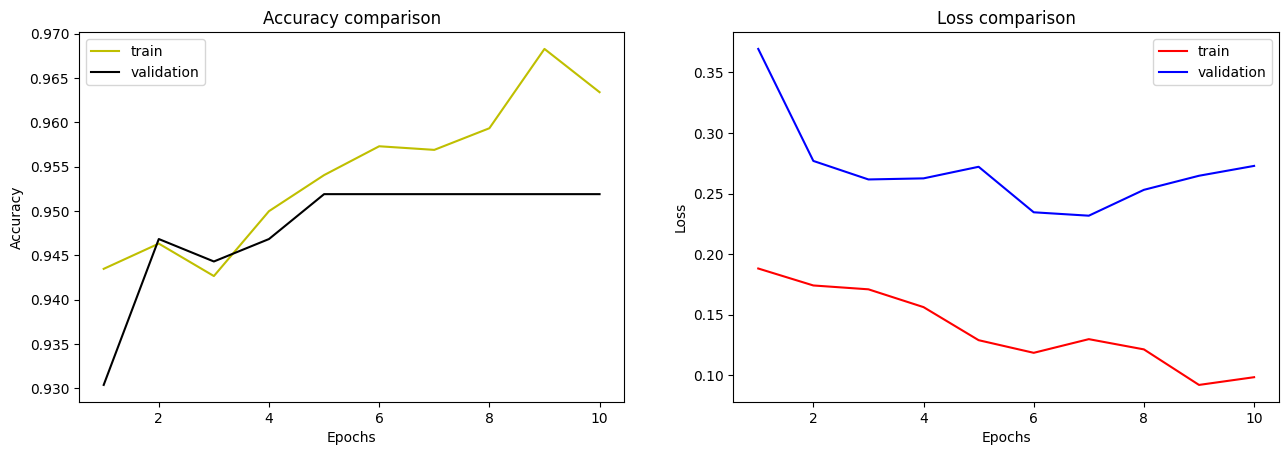

In [42]:
epochs = range(1, len(history_fine_tuning.history['accuracy']) + 1)

# Plot accuracy and loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history_fine_tuning.history['accuracy'], color='y', label='train')
plt.plot(epochs, history_fine_tuning.history['val_accuracy'], color='k', label='validation')
plt.legend()
plt.title('Accuracy comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, history_fine_tuning.history['loss'], color='r', label='train')
plt.plot(epochs, history_fine_tuning.history['val_loss'], color='b', label='validation')
plt.legend()
plt.title('Loss comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplots_adjust(right=2)
plt.show()